In [80]:
# All Imports
from collections import Counter
from operator import itemgetter
import ConfigParser
import matplotlib.pyplot as plt
import networkx as nx
import sys
import time
import io
import re
import nltk
#nltk.download()
from nltk.corpus import sentiwordnet
from nltk.corpus import SentiWordNetCorpusReader, SentiSynset
import pylab as plt

%matplotlib inline
swn_root = './'
swn_filename = 'SentiWordNet_3.0.0_20130122.txt'
swn = SentiWordNetCorpusReader(swn_root,swn_filename,encoding='utf-8')

In [2]:
# Converts a file to list of strings where each item is one line of the file.
def file2string(filename):
    result = []
    result = io.open(filename, encoding='utf8').readlines()
    for val in range(0,len(result)):
        result[val]=re.sub("\n","",result[val])        
    return result

In [13]:
#Create a dictionary with product id as key and item title and manufacturer tuple as value taking a file as input
def productsDictionary(productsfile):
    productlst = file2string(productsfile)
    result = {}
    for product in productlst:
        temp = product.split("\t")
        result[temp[0]]=(temp[1],temp[2])
    return result

product_dictionary = productsDictionary("items.txt")
print "Created product dictionary with",len(product_dictionary.keys()),"products"

Created product dictionary with 37 products


In [14]:
def calculateSynsetScore(review):
    tokens = nltk.word_tokenize(review)
    score = 0
    for t in tokens:
        try:
            synset = swn.senti_synsets(t)[0]
            #print t,"\t",synset
            score = score + synset.pos_score() - synset.neg_score()
        except(IndexError):
            #print "Index error at:", t
            pass
    return score

In [15]:
#Replace the word which contains n't i.e wouldn't,shouldn't  
#   with  would not, should not and return the string.   

def replace_with_not(string):
    ns = ""
    suffix = "n't"
    word = "not"
    for stn in string.split():
        if stn.endswith(suffix):
            stn = stn[:-3]
            ns += stn + ' ' + word + ' '
        else:
            ns += stn + ' '
    return ns
    
replace_with_not("this wouldn't be replaced.")

'this would not be replaced. '

In [16]:
# Reads a file named (productID).txt and returns a list of all reviews present in that file for the given productID
def getAllReviews(productID):
    reviews = file2string("./Reviews_Data/"+ productID+".txt") 
    result = []
    for review_line in reviews:
        #print review.split("->")[1],"\n"
        review = review_line.split("->")[1]
        review = replace_with_not(review)
        score = calculateSynsetScore(review)
        result.append((review,score))
    return result

In [17]:
#Create a dictionary with product id as key and list of its reviews as value.

product_ids = product_dictionary.keys()
product_reviews = {}

for id in product_ids:
    reviews = getAllReviews(id)
    product_reviews[id]=reviews;
    print "Reading reviews for Product ID:",id,"\tNumber of total reviews:",len(reviews)

cnt = Counter()
for key in product_reviews.keys():
    #print "Product ID:",key,"\tNumber of reviews:",len(product_reviews[key])
    cnt[len(product_reviews[key])]+=1
print "\n",cnt

Reading reviews for Product ID: B011N5HFOE 	Number of total reviews: 8
Reading reviews for Product ID: B004KZJ0UM 	Number of total reviews: 316
Reading reviews for Product ID: B00ZOO1RFO 	Number of total reviews: 76
Reading reviews for Product ID: B012BPRLO4 	Number of total reviews: 3
Reading reviews for Product ID: B00PGELA04 	Number of total reviews: 46
Reading reviews for Product ID: B011KFQASE 	Number of total reviews: 100
Reading reviews for Product ID: B00Z1R85O0 	Number of total reviews: 15
Reading reviews for Product ID: B00VGNZ4PG 	Number of total reviews: 50
Reading reviews for Product ID: B015P3SH9W 	Number of total reviews: 59
Reading reviews for Product ID: B00VJ1P7TS 	Number of total reviews: 27
Reading reviews for Product ID: B014V3V9J2 	Number of total reviews: 2
Reading reviews for Product ID: B015PYZXRU 	Number of total reviews: 39
Reading reviews for Product ID: B00VKL0I96 	Number of total reviews: 39
Reading reviews for Product ID: B00XPUUGDI 	Number of total revie

In [18]:
#Calculates average sentiment of all reviews that a product received.
def productAverageScore(reviews_dict):
    result = []
    for pid in reviews_dict.keys():
        reviews_lst = reviews_dict[pid]
        sum = 0
        for review in reviews_lst:
            sum+=review[1]
        
        avg = sum/len(reviews_lst)
        result.append((pid,avg))
        result = sorted(result,key = itemgetter(1),reverse = True)
    
    return result
        
product_avg = productAverageScore(product_reviews)
#print product_avg

num=1
for val in product_avg:
    print "Product", num,":\t",val[0], "\tScore:",val[1]
    num+=1

Product 1 :	B014V3V9J2 	Score: 3.375
Product 2 :	B014B9IS1S 	Score: 1.125
Product 3 :	B005CWIVYI 	Score: 1.11822524752
Product 4 :	B015P3SH9W 	Score: 1.09745762712
Product 5 :	B00FF6J532 	Score: 1.0110204918
Product 6 :	B00IU745S8 	Score: 0.814705882353
Product 7 :	B013PK8LGQ 	Score: 0.8125
Product 8 :	B00V2KX5JA 	Score: 0.734375
Product 9 :	B00VJ1P7TS 	Score: 0.597222222222
Product 10 :	B00PGELA04 	Score: 0.573369565217
Product 11 :	B00XPUUGDI 	Score: 0.540540540541
Product 12 :	B00NJNE6AA 	Score: 0.535484848485
Product 13 :	B00Z1R85O0 	Score: 0.5
Product 14 :	B011KFQASE 	Score: 0.49853
Product 15 :	B015PYZXRU 	Score: 0.471153846154
Product 16 :	B015JVBD64 	Score: 0.471153846154
Product 17 :	B00VGNZ4PG 	Score: 0.47
Product 18 :	B01606KJ6C 	Score: 0.469387755102
Product 19 :	B011N5HFOE 	Score: 0.453125
Product 20 :	B0163GQJOU 	Score: 0.4375
Product 21 :	B015JVB9C2 	Score: 0.429166666667
Product 22 :	B00RY4X8A4 	Score: 0.39
Product 23 :	B004KZJ0UM 	Score: 0.365879746835
Product 24 :	B00

In [19]:
#Calculates average sentiment of all reviews that a product received.
def productFeatureScore(reviews_dict,feature):
    result = []
    for pid in reviews_dict.keys():
        reviews_lst = reviews_dict[pid]
        sum = 0.0
        cnt = 0.0
        for review in reviews_lst:
            reviewstr = review[0].lower()
            if re.findall(feature, reviewstr):
                sum+=review[1]
                cnt+=1
        if cnt != 0:
            avg = sum/cnt
            result.append((pid,avg))
        result = sorted(result,key = itemgetter(1),reverse = True)
    return result

In [40]:
#Searching for products with reviews related to touch
product_touch = productFeatureScore(product_reviews,"touch")

num=1
for val in range(10):
    print num,": %s \t\t\tScore: %.2f" %(product_dictionary[product_touch[val][0]][0], product_touch[val][1])
    num+=1

1 : DELL Inspiron i3452-5600BLK Laptop 			Score: 6.25
2 : Apple MacBook Pro MD313LL/A 13.3-Inch Laptop 			Score: 3.36
3 : Microsoft Surface 2 (32 GB) 			Score: 3.31
4 : Dell Inspiron i3000-5099SLV Touchscreen Laptop 			Score: 3.12
5 : 2015 Newest Model Dell Inspiron 15 Laptop Computer 			Score: 3.00
6 : Dell Inspiron i7359-6790SLV 13.3 Inch 2-in-1 Touchscreen Laptop 			Score: 1.99
7 : Newest Dell Inspiron 15 3000 Series 3551 Laptop 			Score: 1.88
8 : Dell Inspiron 15 7000 Series i7537T Touchscreen Laptop 			Score: 1.51
9 : ASUS F555LA-AB31 15.6-inch Full-HD Laptop 			Score: 1.25
10 : Dell Inspiron i3543 15.6-Inch Touchscreen Laptop 			Score: 1.16


In [41]:
#Searching for products with reviews related to processor
product_processor = productFeatureScore(product_reviews,"processor")

num=1
for val in product_processor:
    print "Product", num,":\t",val[0], "\tScore:",val[1]
    num+=1

Product 1 :	B00VKL0I96 	Score: 6.25
Product 2 :	B00U8DHPX4 	Score: 5.125
Product 3 :	B00FF6J532 	Score: 3.83333333333
Product 4 :	B00V2KX5JA 	Score: 3.0
Product 5 :	B0163GQJOU 	Score: 3.0
Product 6 :	B005CWIVYI 	Score: 2.83522727273
Product 7 :	B015P3SH9W 	Score: 2.325
Product 8 :	B004KZJ0UM 	Score: 1.80516666667
Product 9 :	B011KFQASE 	Score: 1.75686666667
Product 10 :	B014B9IS1S 	Score: 1.625
Product 11 :	B00PGELA04 	Score: 1.5625
Product 12 :	B00VGNZ4PG 	Score: 0.958333333333
Product 13 :	B00K4PATO8 	Score: 0.9375
Product 14 :	B00IU745S8 	Score: 0.921875
Product 15 :	B00XPUUGDI 	Score: 0.875
Product 16 :	B00NJNE6AA 	Score: 0.4605
Product 17 :	B010DOD2G6 	Score: 0.25
Product 18 :	B00RY4X8A4 	Score: 0.2
Product 19 :	B00ZOO1RFO 	Score: 0.0
Product 20 :	B012BPRLO4 	Score: -0.25
Product 21 :	B00IB04M5K 	Score: -0.3375
Product 22 :	B01606KJ6C 	Score: -0.375
Product 23 :	B015PYZXRU 	Score: -0.625
Product 24 :	B015JVBD64 	Score: -0.625
Product 25 :	B00THEP15O 	Score: -0.75
Product 26 :	B011

In [42]:
#Searching for products with reviews related to processor
product_storage = productFeatureScore(product_reviews,"storage")

num=1
for val in product_storage:
    print "Product", num,":\t",val[0], "\tScore:",val[1]
    num+=1

Product 1 :	B00KMRGF28 	Score: 2.875
Product 2 :	B00FF6J532 	Score: 2.63461538462
Product 3 :	B00ZOLT5YC 	Score: 1.875
Product 4 :	B005CWIVYI 	Score: 1.41071428571
Product 5 :	B00RY4X8A4 	Score: 0.875
Product 6 :	B00IU745S8 	Score: 0.875
Product 7 :	B00U8DHPX4 	Score: 0.75
Product 8 :	B00ZOO1RFO 	Score: 0.625
Product 9 :	B00ZS64K7K 	Score: 0.125
Product 10 :	B00XPUUGDI 	Score: -0.125
Product 11 :	B010DODAWM 	Score: -0.25
Product 12 :	B00VGNZ4PG 	Score: -0.4375
Product 13 :	B00THEP15O 	Score: -0.9375
Product 14 :	B011KFQASE 	Score: -1.0
Product 15 :	B00K4PATO8 	Score: -2.125


In [118]:
#Create Graph for Every method. 

def Create_Graph(var):
    x = []
    y = []
    p = []
    for i in range(len(var)):
        p.append(i)
        x.append(var[i][0])            
        y.append(var[i][1])
    plt.bar(p,y,align='center')
    #plt.figure(figsize=(1,1))
    plt.xticks(p,x)
    plt.xlabel('Products')
    plt.ylabel('Average Ratings')
    plt.show()

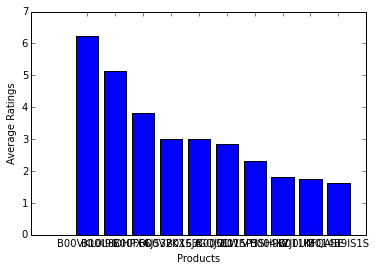

In [119]:
#lis = [('p',3),('q',3),('r',5),('s',1)]

Create_Graph(product_processor[:10])